In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Pocessing

In [2]:
data_location = "data"

In [3]:
def analyze_missing_values(name, data):
    print(f"{name} shape: {data.shape} \n")

    for col in data.columns:
        print(f"{col} - Null Values: {data[col].isnull().sum()}")
    print()

    print(data.head())
    print("------------\n")

    return data

In [4]:
sales_data_train = pd.read_csv(f"{data_location}/train.csv", parse_dates=['date'], skiprows=range(1, 66458909)) #nrows=6000000,
items_data = pd.read_csv(f"{data_location}/items.csv")
stores_data = pd.read_csv(f"{data_location}/stores.csv")
transactions_data = pd.read_csv(f"{data_location}/transactions.csv", parse_dates=['date'])
oil_data = pd.read_csv(f"{data_location}/oil.csv", parse_dates=['date'])
holidays_events_data = pd.read_csv(f"{data_location}/holidays_events.csv", parse_dates=['date'])

In [17]:
analyze_missing_values("sales_data_train", sales_data_train)
analyze_missing_values("items_data", items_data)
analyze_missing_values("stores_data", stores_data)
analyze_missing_values("transactions_data", transactions_data)
analyze_missing_values("oil_data", oil_data)
analyze_missing_values("holidays_events_data", holidays_events_data)

sales_data_train shape: (6000000, 6) 

id - Null Values: 0
date - Null Values: 0
store_nbr - Null Values: 0
item_nbr - Null Values: 0
unit_sales - Null Values: 0
onpromotion - Null Values: 6000000

   id       date  store_nbr  item_nbr  unit_sales  onpromotion
0   0 2013-01-01         25    103665         7.0          NaN
1   1 2013-01-01         25    105574         1.0          NaN
2   2 2013-01-01         25    105575         2.0          NaN
3   3 2013-01-01         25    108079         1.0          NaN
4   4 2013-01-01         25    108701         1.0          NaN
------------

items_data shape: (4100, 4) 

item_nbr - Null Values: 0
family - Null Values: 0
class - Null Values: 0
perishable - Null Values: 0

   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1
--------

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [5]:
sales_data_train['onpromotion'] = sales_data_train['onpromotion'].fillna('Unknown')

In [9]:
def analyze_missing_dates(name, data, date_column):
    missing_dates = set(pd.date_range(start=data[date_column].min(), end=data[date_column].max())) - set(data[date_column])
    print(f"{name} - Missing dates count: {len(missing_dates)}")

In [10]:
analyze_missing_dates("sales_data_train", sales_data_train, 'date')
analyze_missing_dates("transactions_data", transactions_data, 'date')
analyze_missing_dates("oil_data", oil_data, 'date')

sales_data_train - Missing dates count: 0
transactions_data - Missing dates count: 6
oil_data - Missing dates count: 486


In [9]:
oil_data['dcoilwtico_impute'] = oil_data['dcoilwtico'].ffill(axis = 0)
oil_data['dcoilwtico_impute'] = oil_data['dcoilwtico'].bfill(axis = 0)

In [9]:
sales_data_completed = sales_data_train.merge(items_data, on='item_nbr', how='left')
sales_data_completed = sales_data_completed.merge(stores_data, on='store_nbr', how='left')
sales_data_completed = sales_data_completed.merge(transactions_data, on=['store_nbr', 'date'], how='left')
sales_data_completed = sales_data_completed.merge(oil_data, on='date', how='left')
sales_data_completed = sales_data_completed.merge(holidays_events_data, on='date', how='left')

## Seasonality Analysis

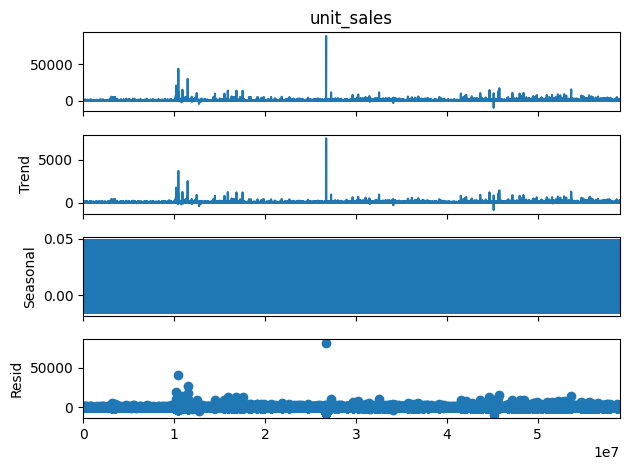

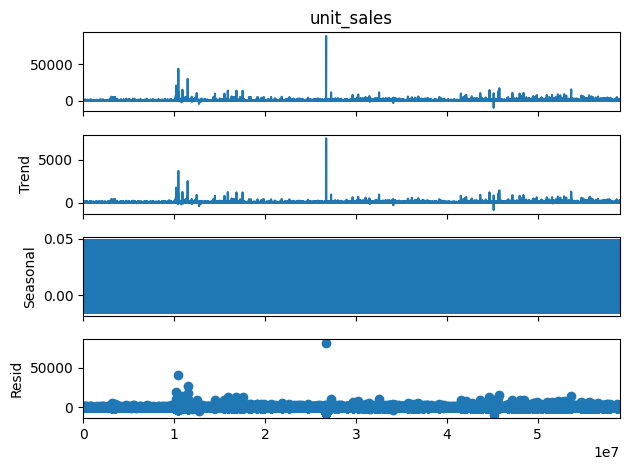

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_data_train_decompose = seasonal_decompose(sales_data_train['unit_sales'], model='additive', period=12)
sales_data_train_decompose.plot()

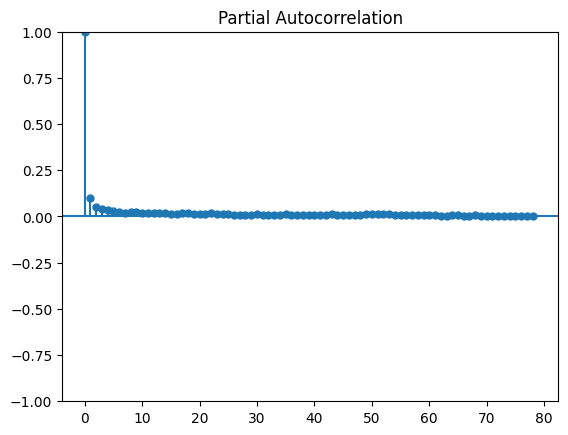

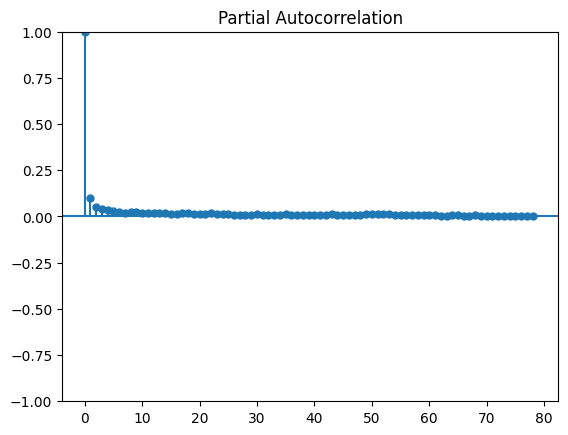

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(sales_data_train['unit_sales'])

## Temporal Analysis

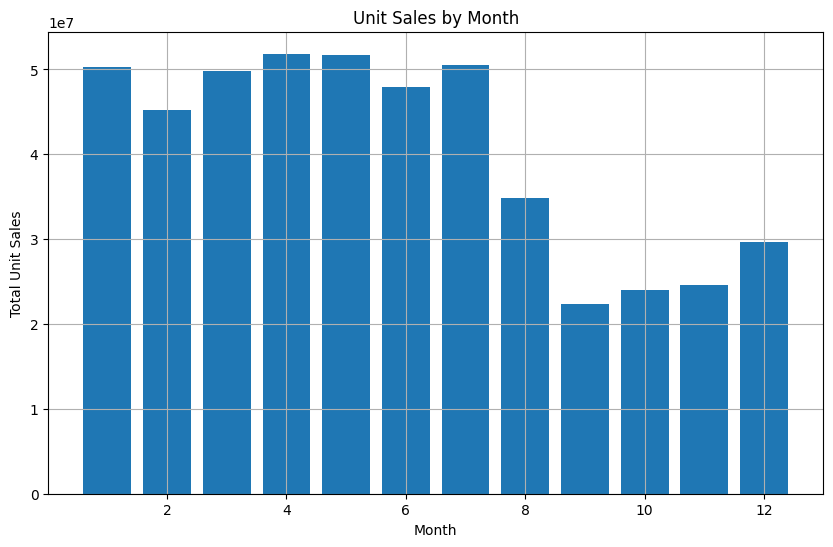

In [7]:
sales_data_train['month'] = sales_data_train['date'].dt.month

monthly_sales = sales_data_train.groupby('month')['unit_sales'].sum()

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Unit Sales')
plt.title('Unit Sales by Month')
plt.grid(True)
plt.show()

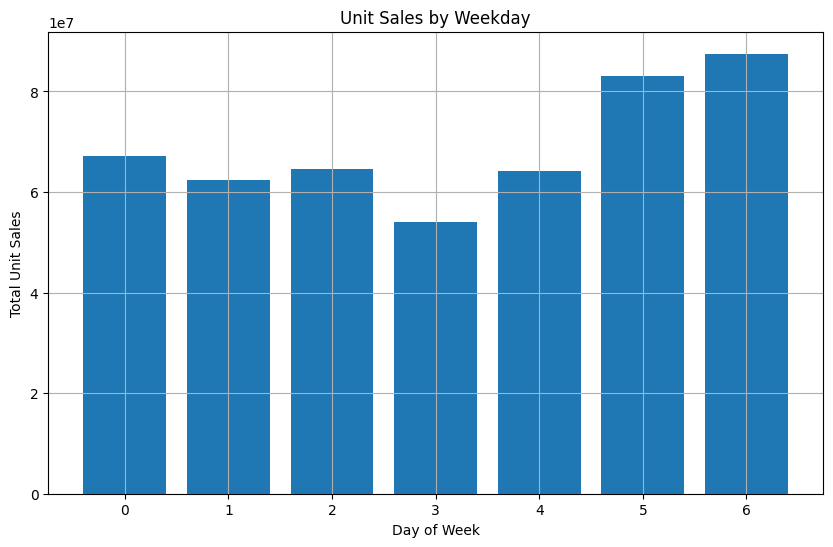

In [9]:
sales_data_train['weekday'] = sales_data_train['date'].dt.weekday

weekday_sales = sales_data_train.groupby('weekday')['unit_sales'].sum()

plt.figure(figsize=(10, 6))
plt.bar(weekday_sales.index, weekday_sales.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Unit Sales')
plt.title('Unit Sales by Weekday')
plt.grid(True)
plt.show()

## Impact of Promotion

C:\Users\CSamarajeewa\AppData\Local\Temp\ipykernel_17064\332792704.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='onpromotion', y='unit_sales', data=sales_data_train, order=['True', 'False'],
C:\Users\CSamarajeewa\AppData\Local\Temp\ipykernel_17064\332792704.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='onpromotion', y='unit_sales', data=sales_data_train, order=['True', 'False'],


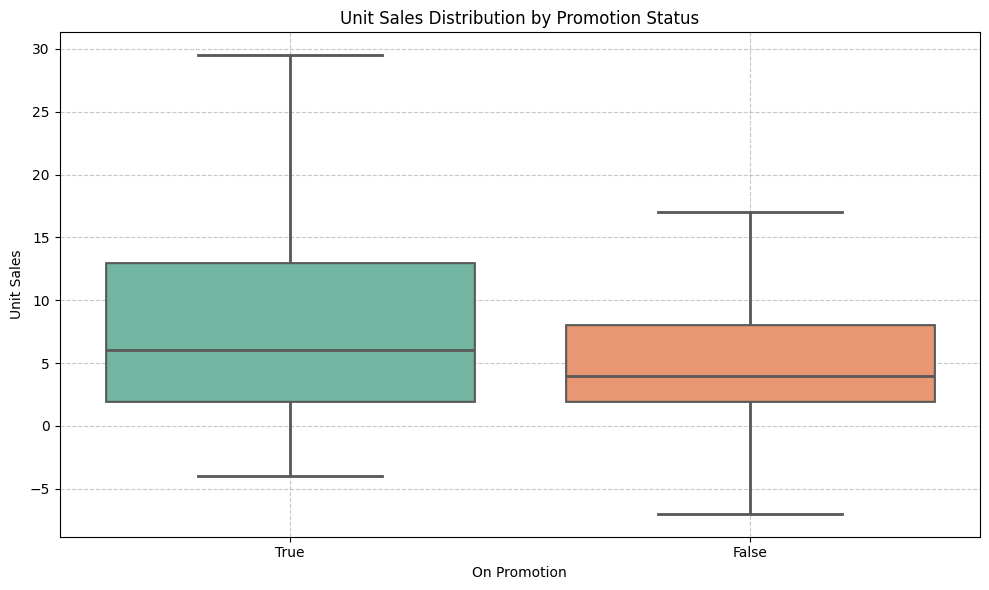

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='onpromotion', y='unit_sales', data=sales_data_train, order=['True', 'False'], 
            showfliers=False, palette='Set2', linewidth=2)

sns.boxplot(x='onpromotion', y='unit_sales', data=sales_data_train, order=['True', 'False'], 
            showcaps=True, showfliers=False, palette='Set2')

plt.xlabel('On Promotion')
plt.ylabel('Unit Sales')
plt.title('Unit Sales Distribution by Promotion Status')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [49]:
sales_data_train.groupby('onpromotion')['unit_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
onpromotion,,,,,,,,
False,52773899.0,7.607035,24.657777,-10002.0,2.0,4.0,8.0,89440.0
True,6264233.0,12.993994,41.180583,-4.0,2.0,6.0,13.0,17146.0


In [11]:
sales_data_completed.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'family', 'class', 'perishable', 'city', 'state', 'type_x', 'cluster',
       'transactions', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred'],
      dtype='object')

## Analysis by Store

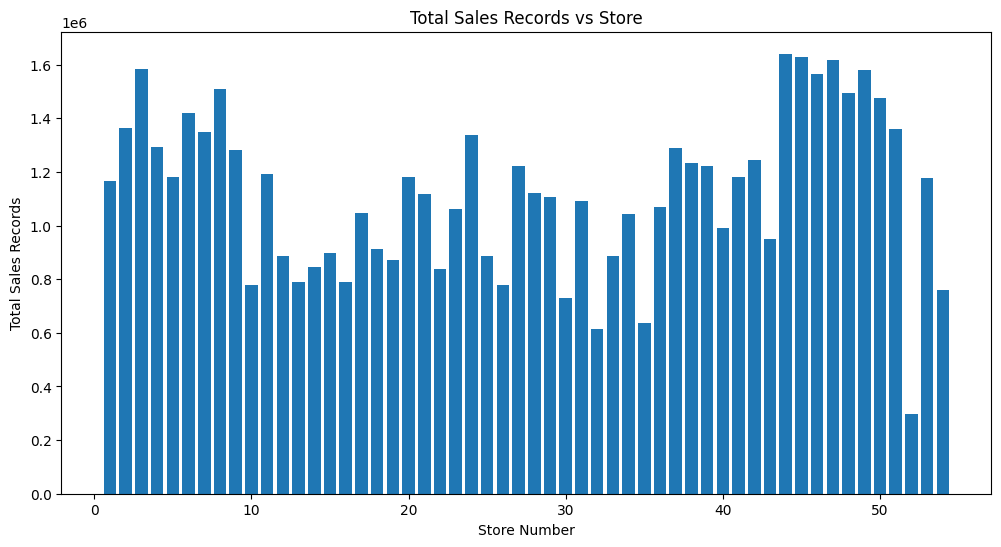

In [19]:
store_sales_count = sales_data_completed.groupby('store_nbr').size().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(store_sales_count.index, store_sales_count.values)

plt.xlabel('Store Number')
plt.ylabel('Total Sales Records')
plt.title('Total Sales Records vs Store')

plt.show()

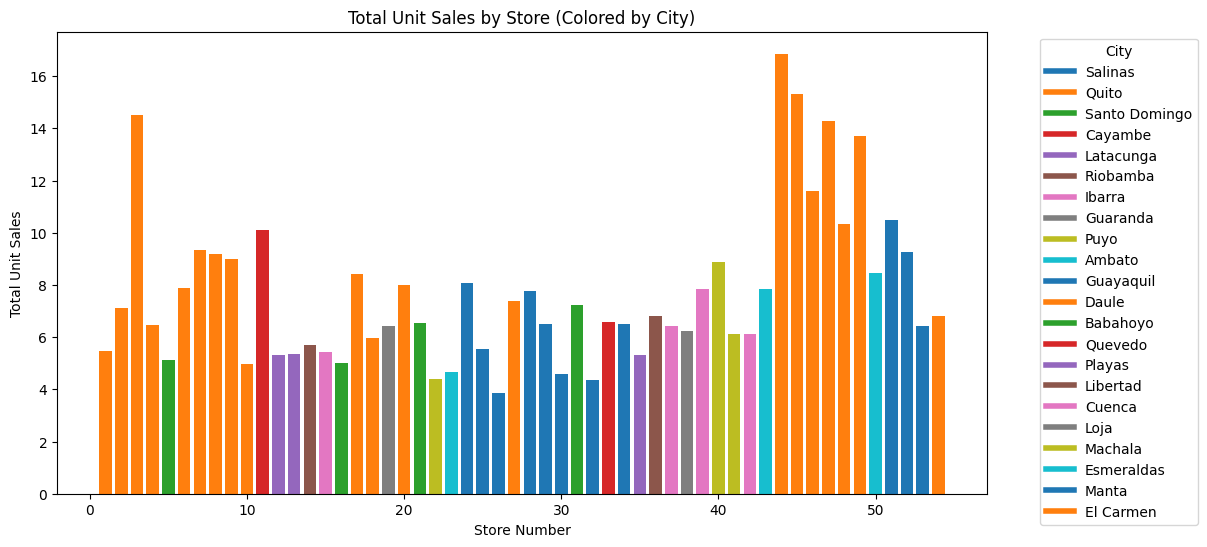

In [20]:
store_sales = sales_data_completed.groupby('store_nbr')['unit_sales'].mean().sort_index()

store_city_mapping = sales_data_completed[['store_nbr', 'city']].drop_duplicates().set_index('store_nbr')['city']

cities = store_city_mapping.unique()
city_colors = dict(zip(cities, sns.color_palette("tab10", len(cities))))

plt.figure(figsize=(12, 6))
bars = [plt.bar(store, store_sales[store], color=city_colors[store_city_mapping[store]]) for store in store_sales.index]

plt.xlabel('Store Number')
plt.ylabel('Total Unit Sales')
plt.title('Total Unit Sales by Store (Colored by City)')

legend_handles = [plt.Line2D([0], [0], color=color, lw=4, label=city) for city, color in city_colors.items()]
plt.legend(handles=legend_handles, title="City", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


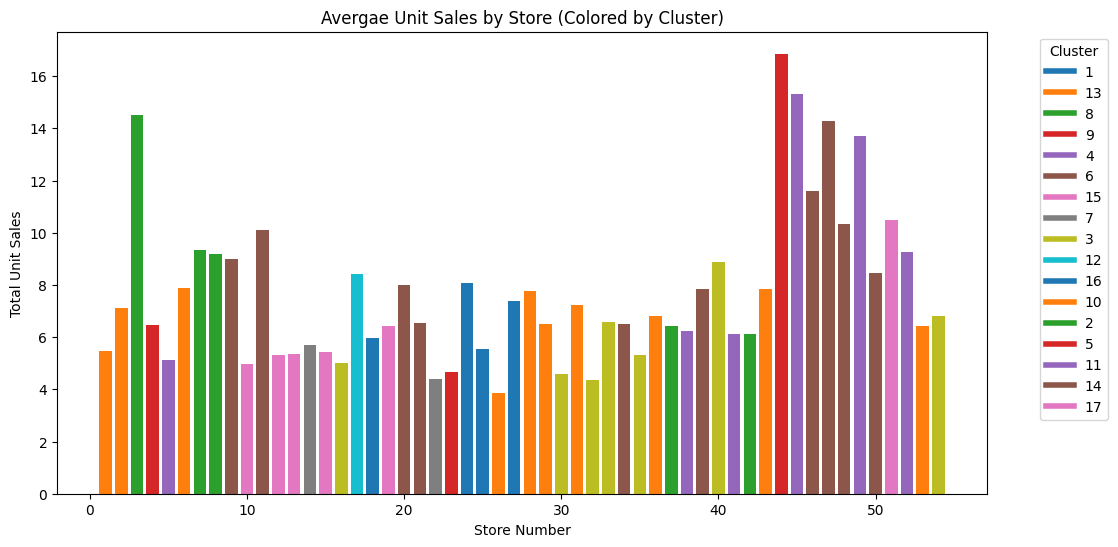

In [13]:
store_sales = sales_data_completed.groupby('store_nbr')['unit_sales'].mean().sort_index()

store_cluster_mapping = sales_data_completed[['store_nbr', 'cluster']].drop_duplicates().set_index('store_nbr')['cluster']

clusters = store_cluster_mapping.unique()
cluster_colors = dict(zip(clusters, sns.color_palette("tab10", len(clusters))))

plt.figure(figsize=(12, 6))
bars = [plt.bar(store, store_sales[store], color=cluster_colors[store_cluster_mapping[store]]) for store in store_sales.index]

plt.xlabel('Store Number')
plt.ylabel('Total Unit Sales')
plt.title('Avergae Unit Sales by Store (Colored by Cluster)')

legend_handles = [plt.Line2D([0], [0], color=color, lw=4, label=city) for city, color in cluster_colors.items()]
plt.legend(handles=legend_handles, title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

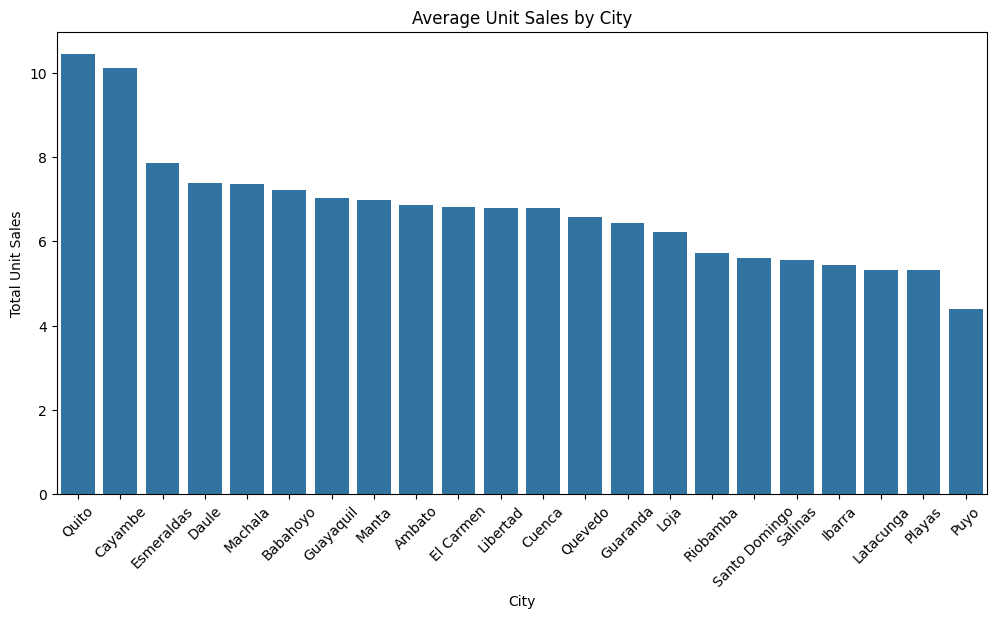

In [14]:
city_sales = sales_data_completed.groupby('city')['unit_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.index, y=city_sales.values)

plt.xlabel('City')
plt.ylabel('Total Unit Sales')
plt.title('Average Unit Sales by City')

plt.xticks(rotation=45)
plt.show()

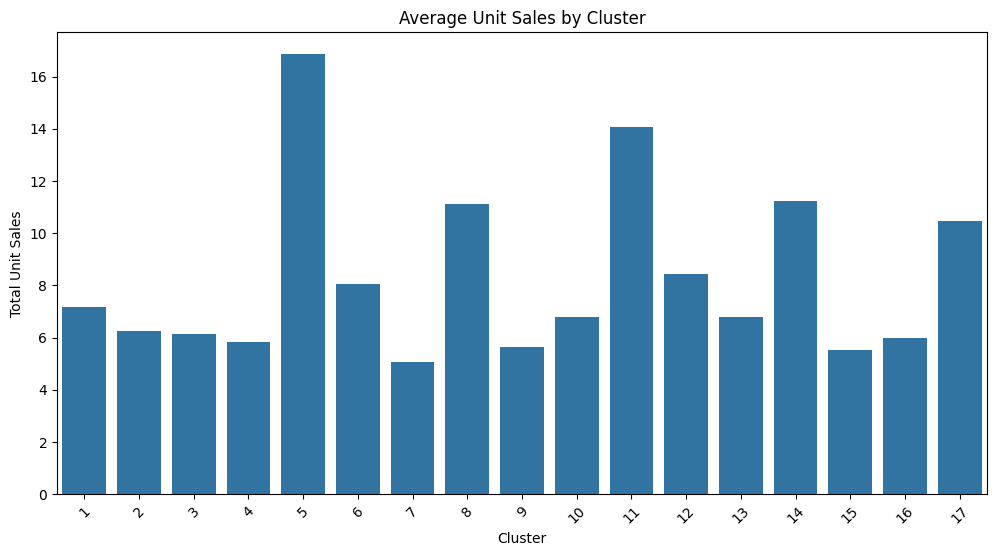

In [28]:
cluster_sales = sales_data_completed.groupby('cluster')['unit_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_sales.index, y=cluster_sales.values)

plt.xlabel('Cluster')
plt.ylabel('Total Unit Sales')
plt.title('Average Unit Sales by Cluster')

plt.xticks(rotation=45)
plt.show()

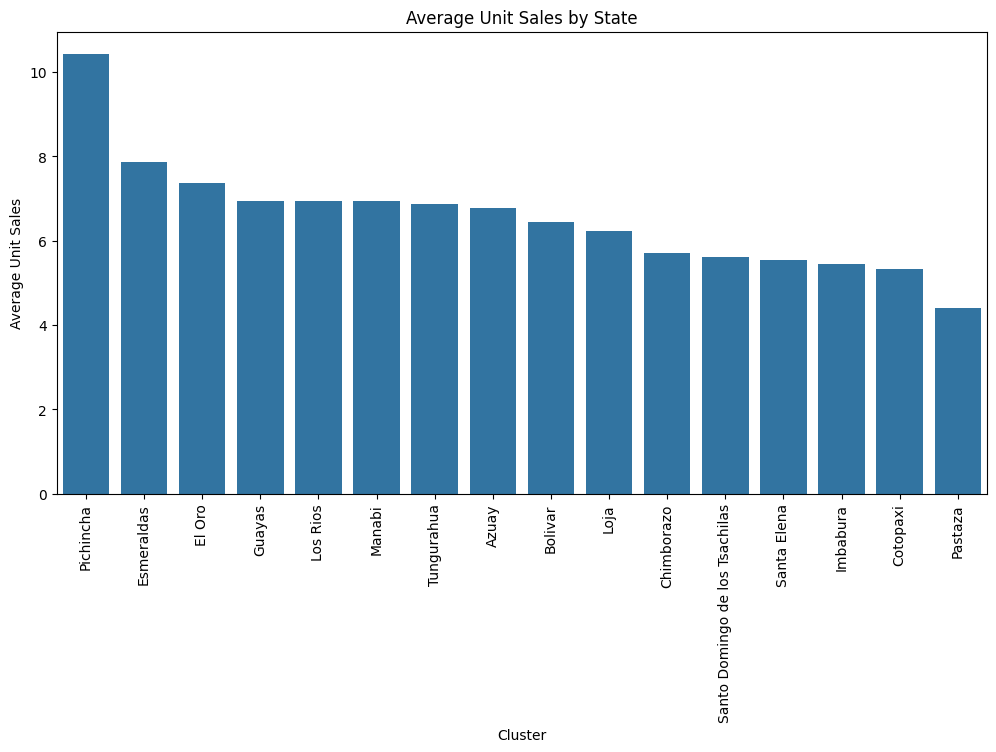

In [16]:
state_sales = sales_data_completed.groupby('state')['unit_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values)

plt.xlabel('Cluster')
plt.ylabel('Average Unit Sales')
plt.title('Average Unit Sales by State')

plt.xticks(rotation=90)
plt.show()

In [24]:
sales_data_completed.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'city', 'state', 'type_x', 'cluster', 'transactions', 'dcoilwtico',
       'dcoilwtico_impute', 'type_y', 'locale', 'locale_name', 'description',
       'transferred'],
      dtype='object')

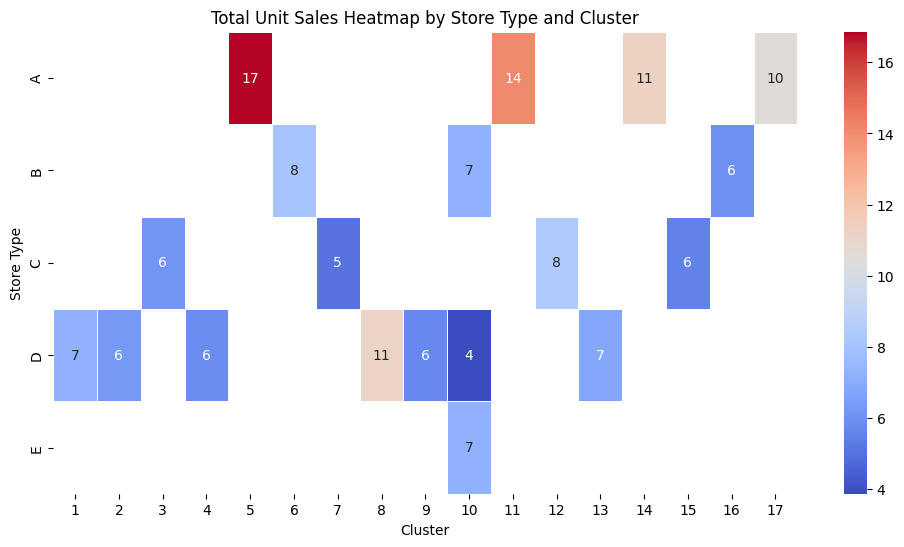

In [17]:
heatmap_data = sales_data_completed.pivot_table(index='type_x', columns='cluster', values='unit_sales', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel('Cluster')
plt.ylabel('Store Type')
plt.title('Total Unit Sales Heatmap by Store Type and Cluster')
plt.show()


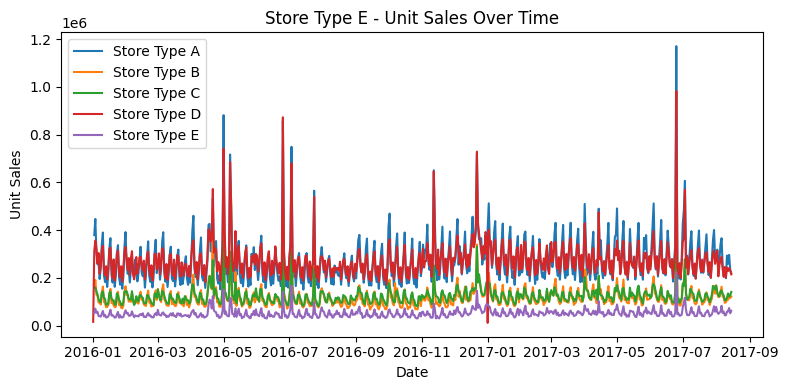

In [18]:
store_type_sales = sales_data_completed.groupby(['type_x', 'date'])['unit_sales'].sum().reset_index()

store_types = store_type_sales['type_x'].unique()

fig, axes = plt.subplots(1, 1, figsize=(8, 4), sharex=True)

for i, store_type in enumerate(store_types):
    subset = store_type_sales[store_type_sales['type_x'] == store_type]
    axes.plot(subset['date'], subset['unit_sales'], label=f'Store Type {store_type}', color=sns.color_palette("tab10")[i])

axes.set_title(f'Store Type {store_type} - Unit Sales Over Time')
axes.set_ylabel('Unit Sales')
axes.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

C:\Users\CSamarajeewa\AppData\Local\Temp\ipykernel_17064\2774770611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type_x', y='transactions', data=store_transactions, palette='viridis')


Text(0, 0.5, 'Total Transactions')

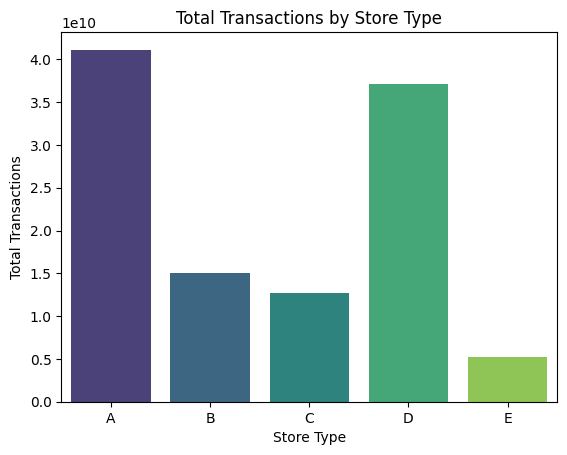

In [19]:
store_transactions = sales_data_completed.groupby(['type_x'])['transactions'].sum().reset_index()

sns.barplot(x='type_x', y='transactions', data=store_transactions, palette='viridis')
plt.title('Total Transactions by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Transactions')

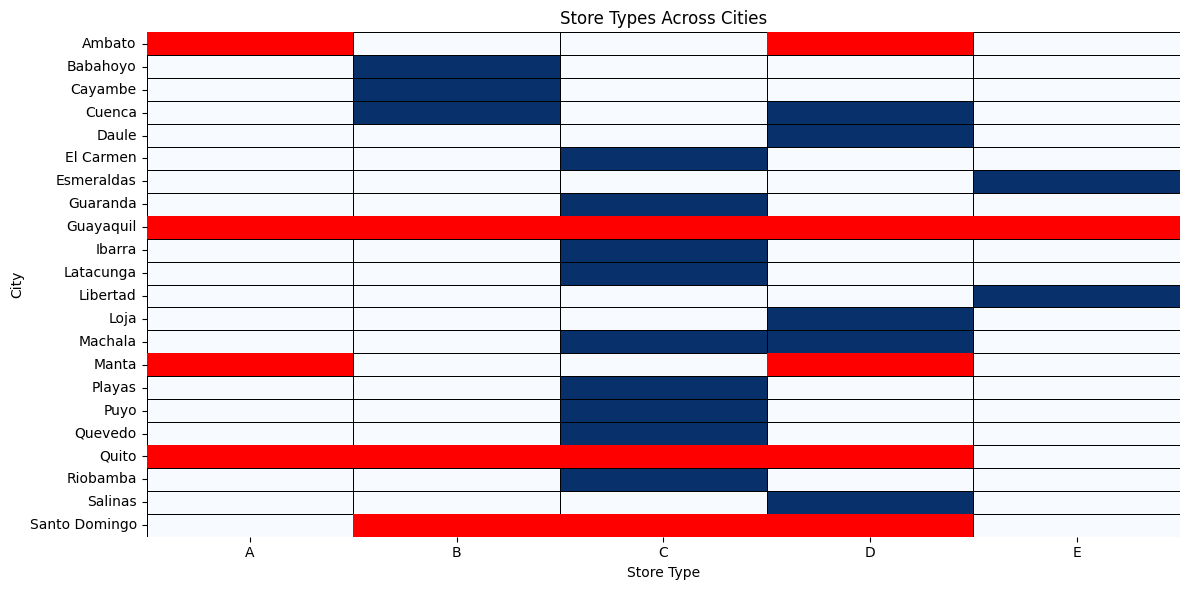

In [45]:
major_cities = ['Quito', 'Guayaquil', 'Ambato', 'Manta', 'Santo Domingo']

store_city_df = sales_data_completed[['city', 'type_x']].drop_duplicates()

store_city_matrix = pd.crosstab(store_city_df['city'], store_city_df['type_x'])

plt.figure(figsize=(12, 6))
ax = sns.heatmap(store_city_matrix, cmap='Blues', annot=False, cbar=False, linewidths=0.5, linecolor='black')

for i, city in enumerate(store_city_matrix.index):
    if city in major_cities:
        for j in range(store_city_matrix.shape[1]):
            if store_city_matrix.iloc[i, j] == 1:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color='red', lw=0))

plt.title('Store Types Across Cities')
plt.xlabel('Store Type')
plt.ylabel('City')

plt.tight_layout()
plt.show()


In [51]:
sales_data_completed.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
item_nbr                 int64
unit_sales             float64
onpromotion               bool
family                  object
class                    int64
perishable               int64
city                    object
state                   object
type_x                  object
cluster                  int64
transactions           float64
dcoilwtico             float64
type_y                  object
locale                  object
locale_name             object
description             object
transferred             object
is_holiday                bool
dtype: object

C:\Users\CSamarajeewa\AppData\Local\Temp\ipykernel_17064\1011568686.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unit_sales_corr.values, y=unit_sales_corr.index, palette='coolwarm')


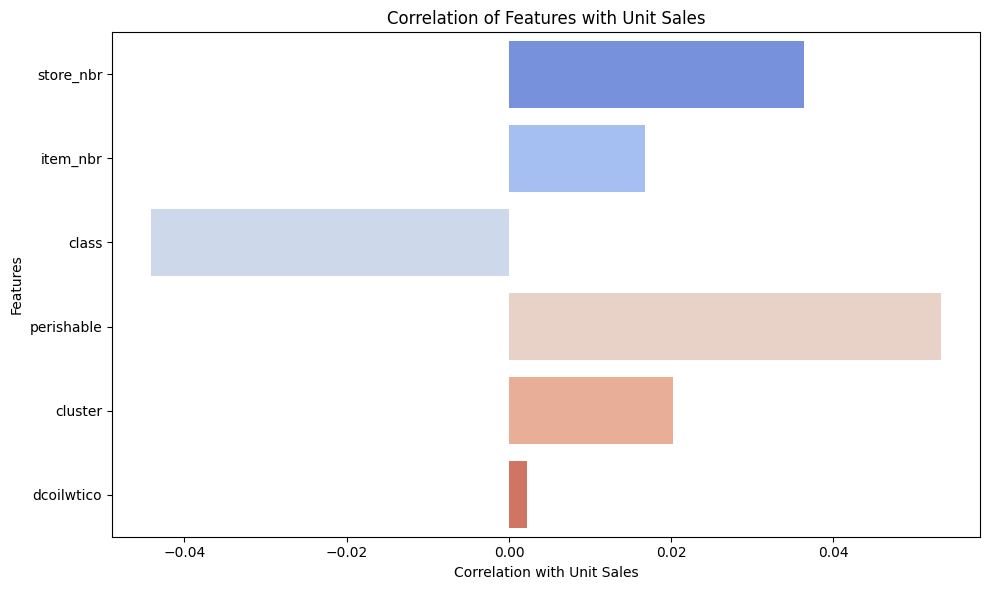

In [53]:
numeric_cols = sales_data_completed.drop(columns=['id', 'transactions']).select_dtypes(include=['number'])

unit_sales_corr = numeric_cols.corr()['unit_sales'].drop('unit_sales')

plt.figure(figsize=(10, 6))
sns.barplot(x=unit_sales_corr.values, y=unit_sales_corr.index, palette='coolwarm')
plt.xlabel('Correlation with Unit Sales')
plt.ylabel('Features')
plt.title('Correlation of Features with Unit Sales')
plt.xticks()
plt.tight_layout()
plt.show()

In [26]:
sales_data_completed.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'family', 'class', 'perishable', 'city', 'state', 'type_x', 'cluster',
       'transactions', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred'],
      dtype='object')

## Analysis by Items

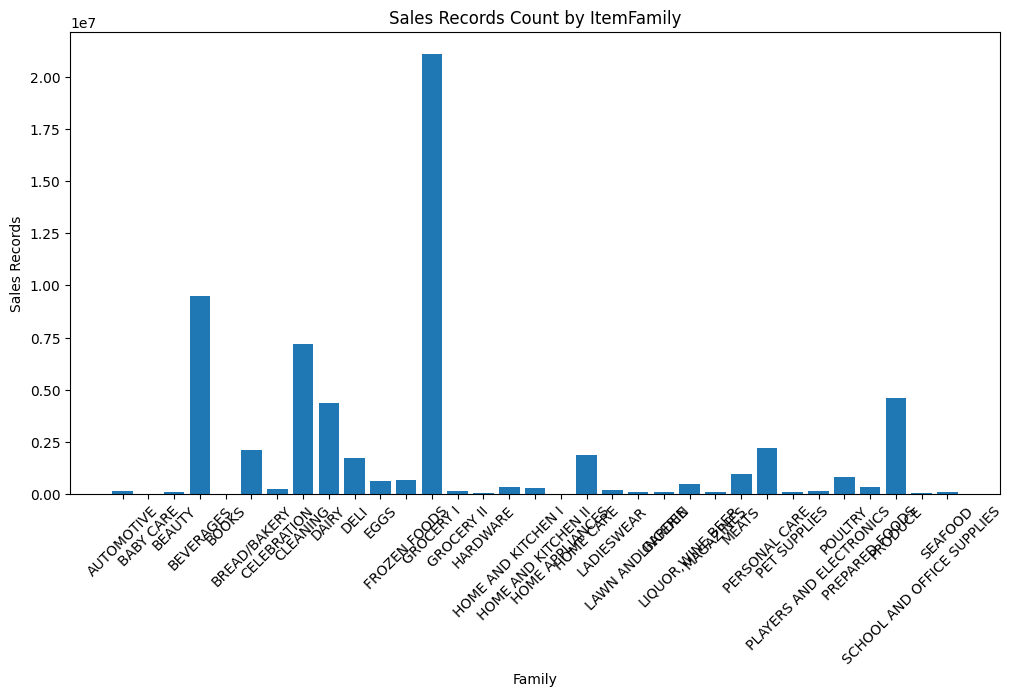

In [31]:
sales_data_count_by_family = sales_data_completed.groupby(['family']).size()

plt.figure(figsize=(12, 6))
plt.bar(sales_data_count_by_family.index, sales_data_count_by_family.values)
plt.title('Sales Records Count by ItemFamily')
plt.xlabel('Family')
plt.ylabel('Sales Records')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

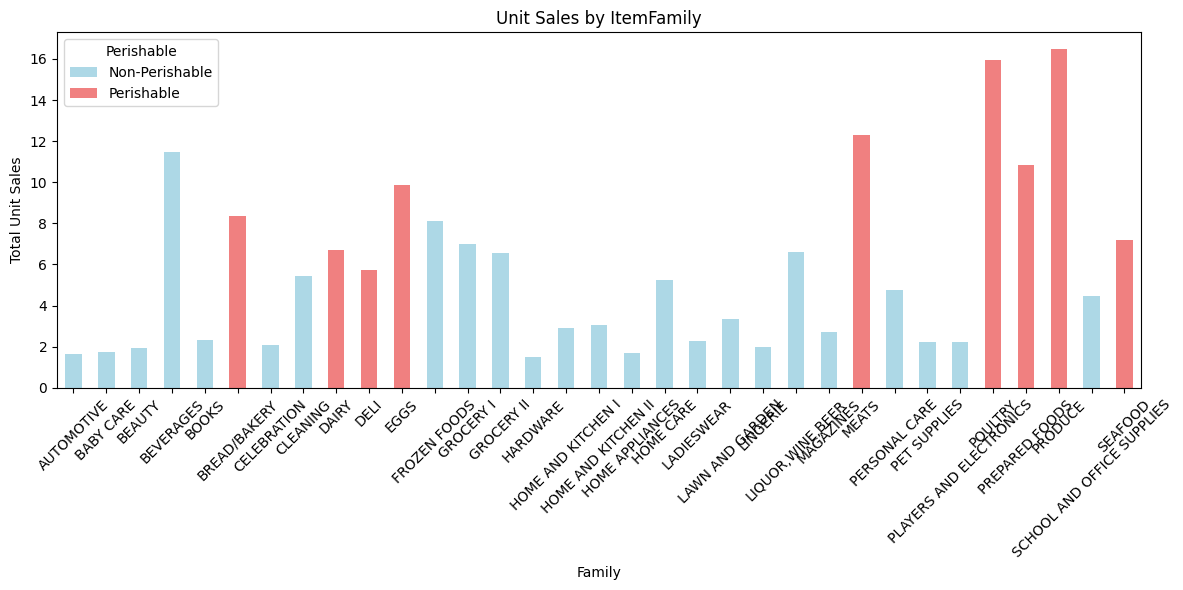

In [22]:
family_perishable_sales = sales_data_completed.groupby(['family', 'perishable'])['unit_sales'].mean().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
family_perishable_sales.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(12, 6))

plt.title('Unit Sales by ItemFamily')
plt.xlabel('Family')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=45)
plt.legend(title='Perishable', labels=['Non-Perishable', 'Perishable'])
plt.tight_layout()
plt.show()


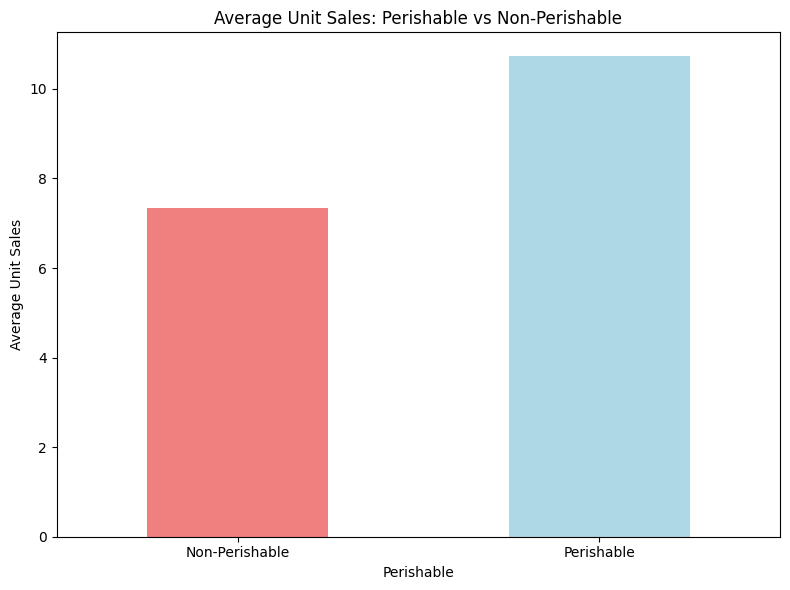

In [46]:
perishable_sales = sales_data_completed.groupby('perishable')['unit_sales'].mean()

plt.figure(figsize=(8, 6))
perishable_sales.plot(kind='bar', color=['lightcoral', 'lightblue'])

plt.title('Average Unit Sales: Perishable vs Non-Perishable')
plt.xlabel('Perishable')
plt.ylabel('Average Unit Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Perishable', 'Perishable'], rotation=0)
plt.tight_layout()

plt.show()

## Impact of Holidays

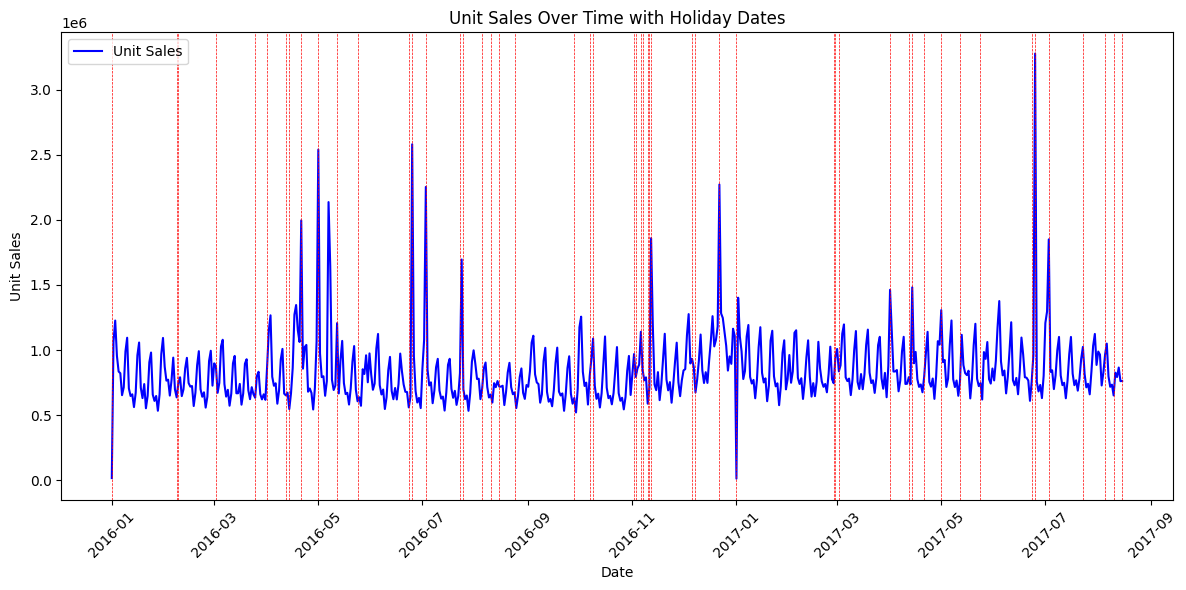

In [26]:
sales_data_completed['date'] = pd.to_datetime(sales_data_completed['date'])

holiday_dates = sales_data_completed[sales_data_completed['type_y'] == 'Holiday']['date'].unique()

daily_sales = sales_data_completed.groupby('date')['unit_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='unit_sales', color='blue', label='Unit Sales')

for holiday in holiday_dates:
    plt.axvline(x=holiday, linestyle='--', color='red', linewidth=0.5)

plt.title('Unit Sales Over Time with Holiday Dates')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\CSamarajeewa\AppData\Local\Temp\ipykernel_17064\3800429418.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_by_type, x='is_holiday', y='unit_sales', palette='Blues_d')


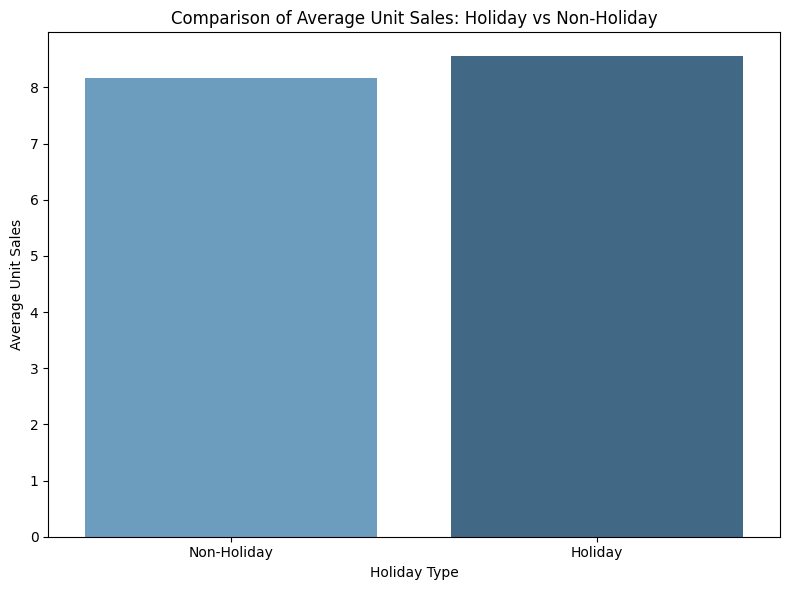

In [27]:
holiday_dates = sales_data_completed[sales_data_completed['type_y'] == 'Holiday']['date'].unique()

sales_data_completed['is_holiday'] = sales_data_completed['date'].isin(holiday_dates)

avg_sales_by_type = sales_data_completed.groupby('is_holiday')['unit_sales'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sales_by_type, x='is_holiday', y='unit_sales', palette='Blues_d')

plt.title('Comparison of Average Unit Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Type')
plt.ylabel('Average Unit Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

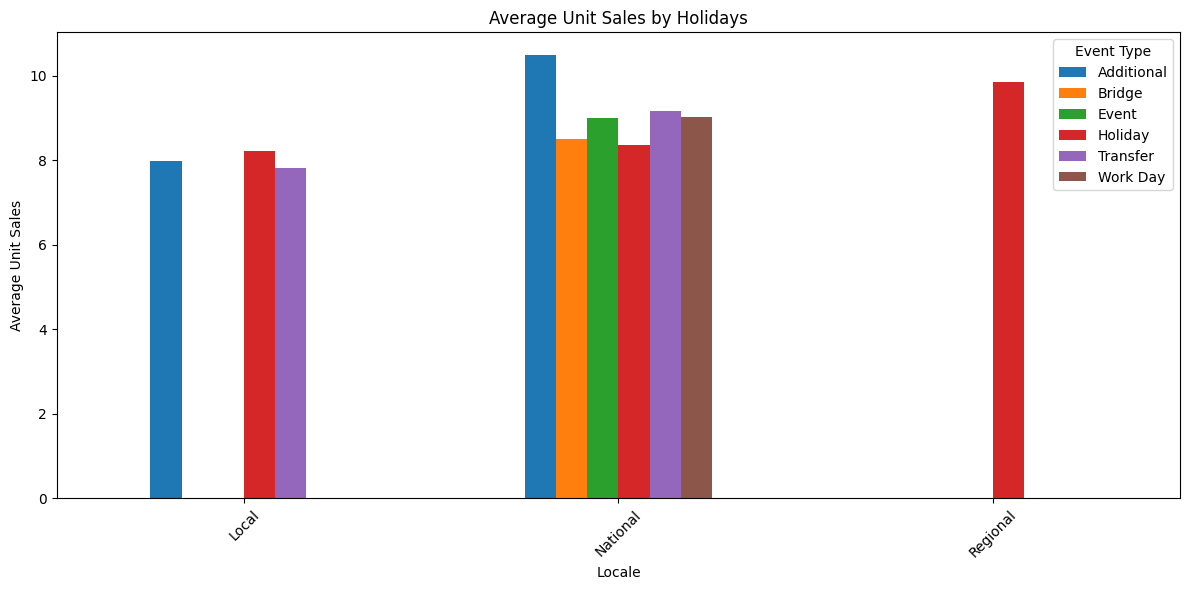

In [24]:
avg_sales_by_event = sales_data_completed.groupby(['locale', 'type_y'])['unit_sales'].mean().reset_index()

pivot_avg_sales = avg_sales_by_event.pivot(index='locale', columns='type_y', values='unit_sales').fillna(0)

plt.figure(figsize=(12, 6))
pivot_avg_sales.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Average Unit Sales by Holidays')
plt.xlabel('Locale')
plt.ylabel('Average Unit Sales')
plt.xticks(rotation=45)
plt.legend(title='Event Type', loc='upper right')
plt.tight_layout()
plt.show()

## Distribution Analysis of Unit Sales

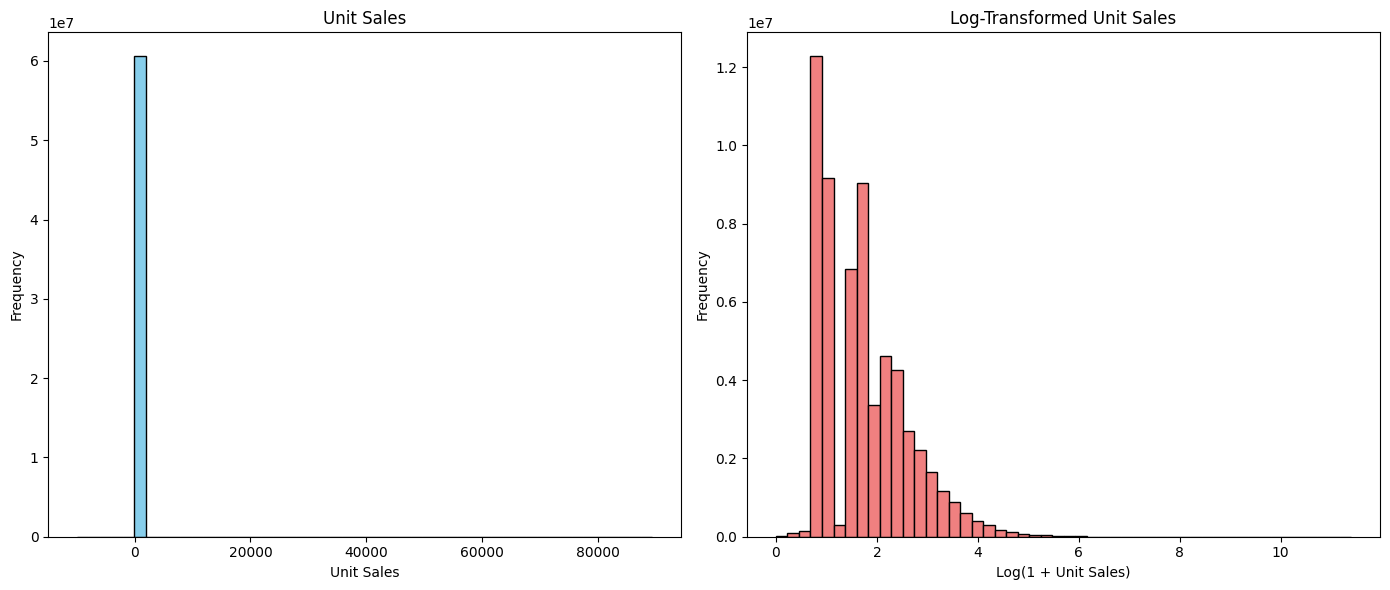

In [55]:
sales_data_completed['log_unit_sales'] = sales_data_completed['unit_sales'].apply(lambda s: np.log1p(s) if s > 0 else 0)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(sales_data_completed['unit_sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Unit Sales')
plt.xlabel('Unit Sales')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sales_data_completed['log_unit_sales'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Log-Transformed Unit Sales')
plt.xlabel('Log(1 + Unit Sales)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()